In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()
# print(model.summary())

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [2]:
import numpy as np
import time
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.callbacks import TensorBoard

In [3]:
path = r'E:\code\TransferLearning\training pics'

img_data_list = []
for dataset in os.listdir(path):
  img_list = os.listdir(path + '/' + dataset)
  print('Loading image from '+ dataset + '\n')
  for img in img_list:
    img_path = "{}/{}/{}".format(path, dataset,img)
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) #? why we expend one dim
    x = preprocess_input(x)
#     print('Input image shape', x.shape)
    img_data_list.append(x)


Loading image from cats

Loading image from dogs

Loading image from horses



In [4]:
img_data = np.array(img_data_list)
print(img_data.shape)
img_data = np.rollaxis(img_data,1,0)
print(img_data.shape)
img_data = img_data[0]
print(img_data.shape)

(606, 1, 224, 224, 3)
(1, 606, 224, 224, 3)
(606, 224, 224, 3)


In [5]:
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,), dtype='int64')

# names = ['horse', 'dog','cat']
names = ['cat','dog','horse']
labels[0:202] = 0
labels[202:404]= 1
labels[404:606]=2

Y = np_utils.to_categorical(labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

image_input = Input(shape = (224,224, 3))
model = VGG16(input_tensor = image_input, weights = 'imagenet')
# model = ResNet50(weights='imagenet', include_top=False, input_tensor = image_input)
# model.summary()
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input,out)
# custom_vgg_model.summary()



In [22]:
for layer in custom_vgg_model.layers[:-1]:
  layer.trainable = False

print(custom_vgg_model.layers[1].trainable)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)

False


In [23]:

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t = time.time()
hist = custom_vgg_model.fit(X_train,y_train, batch_size = 16 , epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[tensorboard])
print('Training time: %s' %(t-time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size = 10, verbose=1)

print('loss={:.4f}, accuracy: {:.4f}%'.format(loss, accuracy * 100))

Train on 484 samples, validate on 122 samples
Epoch 1/10
484/484 [==============================] - 2s 5ms/step - loss: 7.3442e-07 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9836
Epoch 2/10
484/484 [==============================] - 2s 4ms/step - loss: 2.0664e-07 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9836
Epoch 3/10
484/484 [==============================] - 2s 4ms/step - loss: 1.8965e-08 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9836
Epoch 4/10
484/484 [==============================] - 2s 5ms/step - loss: 1.0591e-08 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9836
Epoch 5/10
484/484 [==============================] - 2s 5ms/step - loss: 5.6649e-09 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9836
Epoch 6/10
484/484 [==============================] - 2s 4ms/step - loss: 2.9556e-09 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9836
Epoch 7/10
484/484 [==============================] - 2s 4ms/step - loss: 1.72

In [21]:
tensorboard  --logdir .logs/

SyntaxError: invalid syntax (<ipython-input-21-3543fd9d2db0>, line 1)

In [9]:
import matplotlib.pyplot as plt

In [10]:
hist.history['loss']

[0.22144018224448211,
 0.021955024010370954,
 0.005049949120787888,
 0.0015966625915323615,
 0.0002788283008240714,
 9.040880965683244e-05,
 3.009396594924217e-05,
 1.3470762158324789e-05,
 4.196651040018886e-06,
 2.5420394590037927e-06]

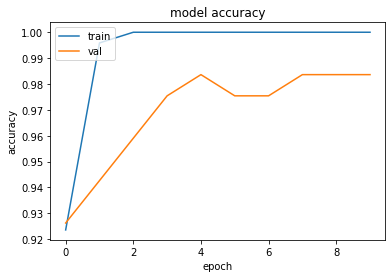

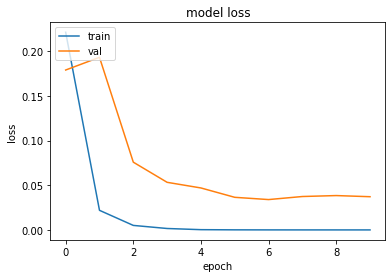

In [11]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("acc_test.png")
# plt.show()

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("loss_test.png")

In [12]:
# train last 3 fc layer
image_input = Input(shape=(224,224,3))

model =  VGG16(input_tensor=image_input, include_top=True, weights='imagenet')
model.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
# training
custom_vgg_model2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
t = time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t-time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size = 10, verbose = 1)

print( 'loss = {:.4f}, accuracy: {:.4f}%'.format(loss,accuracy*100))

Train on 484 samples, validate on 122 samples
Epoch 1/1
484/484 [==============================] - 5s 11ms/step - loss: 17.1329 - accuracy: 0.6983 - val_loss: 2.1060 - val_accuracy: 0.8443
Training time: -5.53410792350769
122/122 [==============================] - 0s 4ms/step
loss = 2.1060, accuracy: 84.4262%


In [15]:
from keras.applications.resnet50 import ResNet50

In [16]:
base_model = ResNet50(weights=None, include_top=True, input_shape=(64,64,3))

In [17]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [18]:
last_layer = base_model.get_layer('avg_pool').output
out = Dense(5, activation='softmax', name='output')(last_layer)
model = Model(base_model.input,out)

In [19]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________